Start with 3 instances and add 1000 balls:

1- Create a ConsistentHashRing object with 3 nodes.
- Add 10k keys to the hash ring.
- Visualize the distribution of keys among nodes.

2- (if I have time later) Add one more node to the hash ring.
- Visualize the distribution of keys among nodes after adding the new node.

3- (if I have time later) Add three more nodes to the hash ring.
- Visualize the distribution of keys among nodes after adding the new nodes.

4- Generate random sizes (ranging from 1-20) for the keys.
- Add the keys with random sizes to the hash ring.
- Visualize the distribution of keys among nodes.
- Visualize sum of key sizes on each node

5- Modify the ConsistentHashRing class to include virtual nodes.
- Add virtual nodes to the hash ring.
- Visualize the distribution of keys among nodes with virtual nodes.
- Visualize sum of key sizes on each node

6- Modify the ConsistentHashRing class to include weights for nodes (Bounded Loads).
- Add nodes with different weights to the hash ring.
- Visualize the distribution of keys among nodes with weighted nodes.
- Visualize sum of key sizes on each node

(if I have time later) Repeat 3 & 4 for 6

Resources:
- [Bounded Load Paper](https://arxiv.org/abs/1608.01350)


Ideal distribution of keys 33.33 %
Total weight across all nodes 105957 AND ideal weight per node 35319.00 

Node1: Number of Keys: 3011 Percentage: 30.11% Delta to ideal 3.22 pts
Total weight: 31838 Delta to ideal 3481.00 - 9.86 %
Node2: Number of Keys: 2291 Percentage: 22.91% Delta to ideal 10.42 pts
Total weight: 24584 Delta to ideal 10735.00 - 30.39 %
Node3: Number of Keys: 4698 Percentage: 46.98% Delta to ideal 13.65 pts
Total weight: 49535 Delta to ideal 14216.00 - 40.25 %

Delta of keys between hottest and coldest node is 24.07 pts
Delta of weights Total Delta: 24951
Max to avg ratio is 40.25 %
Min to avg ratio is -30.39 %


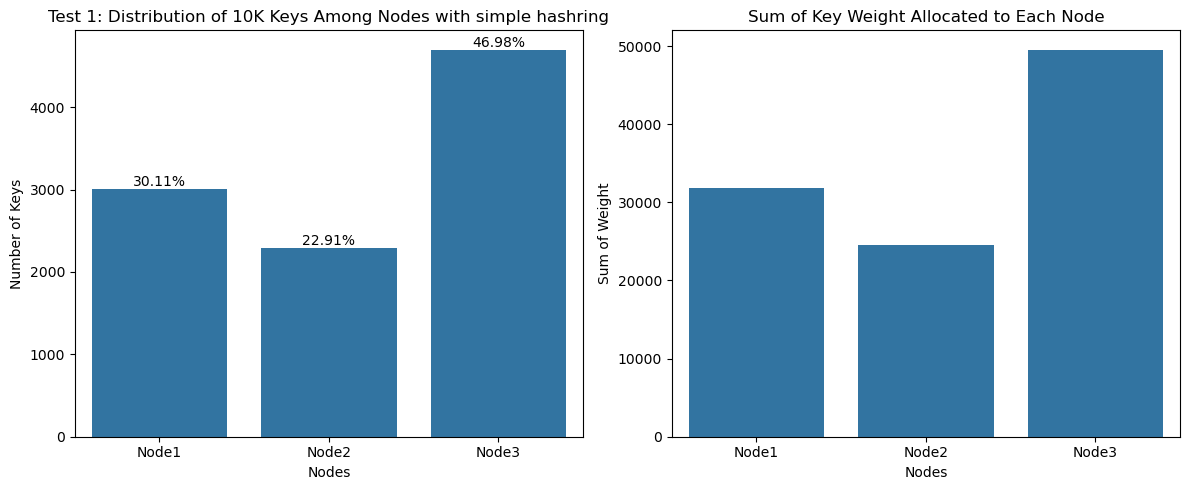

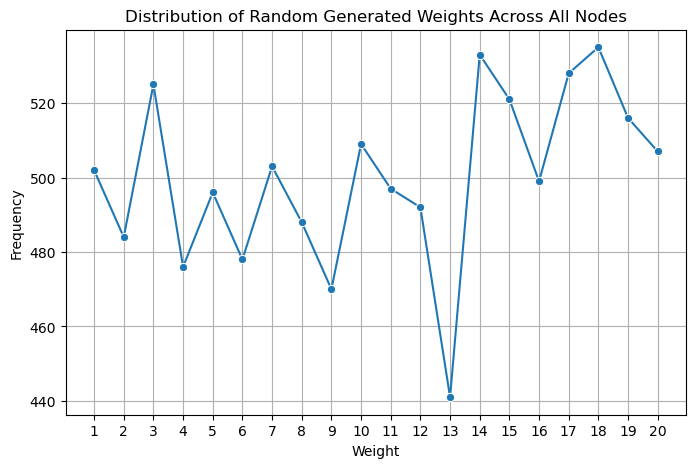

In [47]:
#Test 1
import hashlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class ConsistentHashRing:
    def __init__(self):
        self.nodes = {}

    def add_node(self, node):
        node_hash = self._hash(node)
        self.nodes[node_hash] = node

    def remove_node(self, node):
        node_hash = self._hash(node)
        del self.nodes[node_hash]

    def get_node(self, key):
        if not self.nodes:
            return None
        key_hash = self._hash(key)
        nodes = list(self.nodes.keys())
        nodes.sort()
        for node in nodes:
            if key_hash <= node:
                return self.nodes[node]
        return self.nodes[nodes[0]]

    def _hash(self, key):
        return int(hashlib.md5(key.encode()).hexdigest(), 16)



# Create a consistent hash ring
hash_ring = ConsistentHashRing()

# Add 3 nodes to the hash rings
nodes = ['Node1', 'Node2', 'Node3']
for node in nodes:
    hash_ring.add_node(node)
    
## test 1
# Add 10,000 keys to the hash ring
num_of_keys = 10000
keys = [f'key{i}' for i in range(num_of_keys)]
distribution1 = {node: 0 for node in nodes}
weight_distro = {node: 0 for node in nodes}
total_weight_across_all_nodes = 0
weight_frequency = {i: 0 for i in range(1, 21)} 
for key in keys:
    weight = random.randint(1, 20)
    weight_frequency[weight] += 1 
    node = hash_ring.get_node(key)
    # print(f"debug: weight {weight} key {key} node {node}")
    distribution1[node] += 1
    weight_distro[node] += weight
    total_weight_across_all_nodes += weight

# Sort distribution dictionary by node name
distribution = dict(sorted(distribution1.items()))

dist = 100 / len(nodes)
ideal_weight_dist = total_weight_across_all_nodes / len(nodes)
print(f"Ideal distribution of keys {dist:.2f} %")
print(f"Total weight across all nodes {total_weight_across_all_nodes} AND ideal weight per node {ideal_weight_dist:.2f} \n")
min_dist = 100
max_dist = 0
# Print actual keys and percentage
for node, count in distribution.items():
    pct = 100 * count / num_of_keys
    if pct < min_dist:
        min_dist = pct
    if pct > max_dist:
        max_dist = pct
    delta = abs(dist-pct)
    print(f"{node}: Number of Keys: {count} Percentage: {pct}% Delta to ideal {delta:.2f} pts")
    weight_of_node = weight_distro[node]
    delta_w = abs(ideal_weight_dist - weight_of_node)
    delta_wp = (100 * delta_w) / ideal_weight_dist
    print(f"Total weight: {weight_of_node} Delta to ideal {delta_w:.2f} - {delta_wp:.2f} %")
    
print("----------------------------")
delta_min_max = max_dist - min_dist
print(f"\nDelta of keys between hottest and coldest node is {delta_min_max:.2f} pts ***")

# Find the node with the minimum weight
min_node = min(weight_distro, key=weight_distro.get)
min_weight = weight_distro[min_node]

# Find the node with the maximum weight
max_node = max(weight_distro, key=weight_distro.get)
max_weight = weight_distro[max_node]

delta_total = max_weight - min_weight
print(f"Delta of weights Total Delta: {delta_total}")
print(f"Max to avg ratio is {((100 * (max_weight - ideal_weight_dist))/ideal_weight_dist):.2f} %")
print(f"Min to avg ratio is {((100 * (min_weight - ideal_weight_dist))/ideal_weight_dist):.2f} %")

# Convert distribution dictionary to DataFrame for Seaborn
df = pd.DataFrame(distribution.items(), columns=['Node', 'Number of Keys'])

# Calculate percentages
df['Percentage'] = df['Number of Keys'] / df['Number of Keys'].sum() * 100

# Plot distribution of keys among nodes using Seaborn (bar plot)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Node', y='Number of Keys')
plt.xlabel('Nodes')
plt.ylabel('Number of Keys')
plt.title('Test 1: Distribution of 10K Keys Among Nodes with simple hashring')

# Display percentages on the bar chart
for i, row in df.iterrows():
    plt.text(i, row['Number of Keys'], f'{row["Percentage"]:.2f}%', ha='center', va='bottom')

# Calculate the sum of key sizes allocated to each node
df2 = pd.DataFrame(weight_distro.items(), columns=['Node', 'Total Weight'])
# Visualize the sum of key sizes allocated to each node
plt.subplot(1, 2, 2)
sns.barplot(data=df2, x='Node', y='Total Weight')
plt.xlabel('Nodes')
plt.ylabel('Sum of Weight')
plt.title('Sum of Key Weight Allocated to Each Node')

plt.tight_layout()

# Plot distribution of weights across all nodes

# Convert weight_frequency dictionary to Pandas Series
weight_series = pd.Series(weight_frequency)
plt.figure(figsize=(8, 5))
sns.lineplot(x=weight_series.index, y=weight_series.values, marker='o')

plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Random Generated Weights Across All Nodes')
plt.xticks(range(1, 21))
plt.grid(True)
    
plt.show()

Ideal distribution of keys 33.33 %
Total weight across all nodes 104816 AND ideal weight per node 34938.67 

Node1: Number of Keys: 3689 Percentage: 36.89% Delta to ideal 3.56 pts
Total weight: 38474 Delta to ideal 3535.33 - 10.12 %
Node2: Number of Keys: 2991 Percentage: 29.91% Delta to ideal 3.42 pts
Total weight: 31478 Delta to ideal 3460.67 - 9.90 %
Node3: Number of Keys: 3320 Percentage: 33.2% Delta to ideal 0.13 pts
Total weight: 34864 Delta to ideal 74.67 - 0.21 %
----------------------------

Delta between hottest and coldest node is 6.98 pts ***
Delta of weights Total Delta: 6996
Max to avg ratio is 10.12 %
Min to avg ratio is -9.90 %


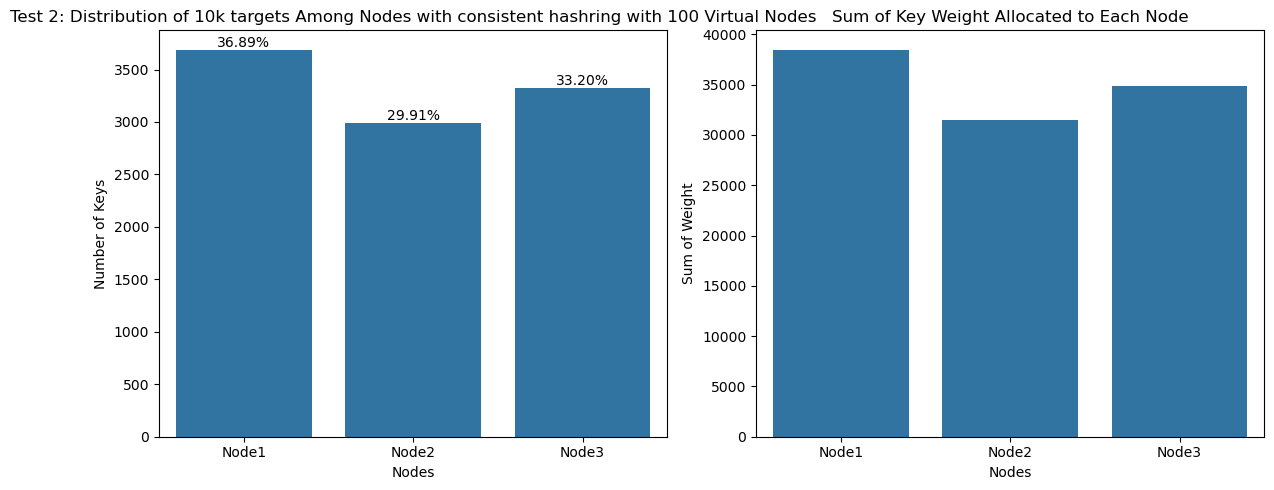

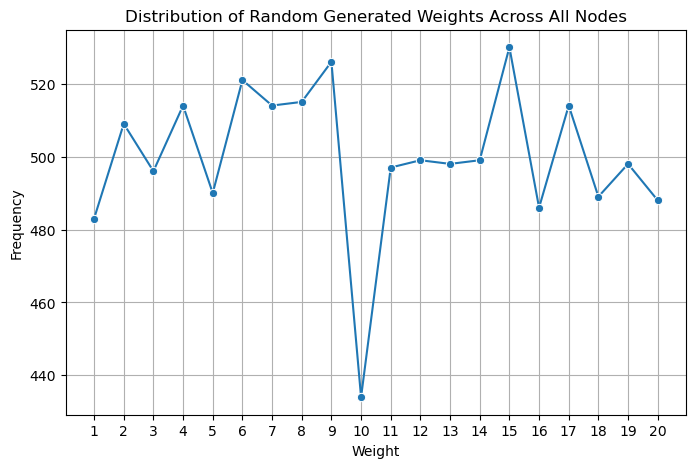

In [65]:
# Test 2 
import hashlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the ConsistentHashRing class (you can reuse the class definition from earlier)
class ConsistentHashRingWithVirtualNodes:
    def __init__(self, replicas=100):
        self.replicas = replicas
        self.nodes = {}

    def add_node(self, node):
        for i in range(self.replicas):
            key = self._hash("{}{}".format(node, i))
            self.nodes[key] = node

    def remove_node(self, node):
        for i in range(self.replicas):
            key = self._hash("{}{}".format(node, i))
            del self.nodes[key]

    def get_node(self, key):
        if not self.nodes:
            return None
        hashed_key = self._hash(key)
        sorted_node_keys = sorted(self.nodes.keys()) 
        for node_key in sorted_node_keys:
            if hashed_key <= node_key:
                return self.nodes[node_key]
        # print("Debug: Edge case on get node")
        return self.nodes[sorted_node_keys[0]]
    
    def _hash(self, key):
        return int(hashlib.md5(key.encode()).hexdigest(), 16)

# Create a ConsistentHashRingWithVirtualNodes object with 3 nodes 100 vNodes
hash_ring2 = ConsistentHashRingWithVirtualNodes(replicas=100)

# Example usage:

nodes = ['Node1', 'Node2', 'Node3']
for node in nodes:
    hash_ring2.add_node(node)
    
num_of_keys = 10000

keys = [f'key{i}' for i in range(num_of_keys)]
distribution2 = {node: 0 for node in nodes}
weight_distro2 = {node: 0 for node in nodes}
total_weight_across_all_nodes = 0
weight_frequency2 = {i: 0 for i in range(1, 21)}
for key in keys:
    weight = random.randint(1, 20)
    weight_frequency2[weight] += 1
    node = hash_ring2.get_node(key)
    # print(f"debug: weight {weight} key {key} node {node}")
    distribution2[node] += 1
    weight_distro2[node] += weight
    total_weight_across_all_nodes += weight

dist = 100 / len(nodes)
ideal_weight_dist = total_weight_across_all_nodes / len(nodes)
print(f"Ideal distribution of keys {dist:.2f} %")
print(f"Total weight across all nodes {total_weight_across_all_nodes} AND ideal weight per node {ideal_weight_dist:.2f} \n")
min_dist = 100
max_dist = 0


for node, count in distribution2.items():
    pct = 100 * count / num_of_keys
    if pct < min_dist:
        min_dist = pct
    if pct > max_dist:
        max_dist = pct
    delta = abs(dist-pct)
    print(f"{node}: Number of Keys: {count} Percentage: {pct}% Delta to ideal {delta:.2f} pts")
    weight_of_node = weight_distro2[node]
    delta_w = abs(ideal_weight_dist - weight_of_node)
    delta_wp = (100 * delta_w) / ideal_weight_dist
    print(f"Total weight: {weight_of_node} Delta to ideal {delta_w:.2f} - {delta_wp:.2f} %")
    
print("----------------------------")
delta_min_max = max_dist - min_dist
print(f"\nDelta between hottest and coldest node is {delta_min_max:.2f} pts ***")

# Find the node with the minimum weight
min_node = min(weight_distro2, key=weight_distro2.get)
min_weight = weight_distro2[min_node]

# Find the node with the maximum weight
max_node = max(weight_distro2, key=weight_distro2.get)
max_weight = weight_distro2[max_node]

delta_total = max_weight - min_weight
print(f"Delta of weights Total Delta: {delta_total}")
print(f"Max to avg ratio is {((100 * (max_weight - ideal_weight_dist))/ideal_weight_dist):.2f} %")
print(f"Min to avg ratio is {((100 * (min_weight - ideal_weight_dist))/ideal_weight_dist):.2f} %")

# Convert distribution dictionary to DataFrame for Seaborn
df = pd.DataFrame(distribution2.items(), columns=['Node', 'Number of Keys'])

# Calculate percentages
df['Percentage'] = df['Number of Keys'] / df['Number of Keys'].sum() * 100

# Plot distribution of keys among nodes using Seaborn (bar plot)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Node', y='Number of Keys')
plt.title('Distribution of Keys Among Nodes')
plt.xlabel('Nodes')
plt.ylabel('Number of Keys')
plt.title('Test 2: Distribution of 10k targets Among Nodes with consistent hashring with 100 Virtual Nodes')

# Display percentages on the bar chart
for i, row in df.iterrows():
    plt.text(i, row['Number of Keys'], f'{row["Percentage"]:.2f}%', ha='center', va='bottom')

# Calculate the sum of key sizes allocated to each node
df2 = pd.DataFrame(weight_distro2.items(), columns=['Node', 'Total Weight'])
# Visualize the sum of key sizes allocated to each node
plt.subplot(1, 2, 2)
sns.barplot(data=df2, x='Node', y='Total Weight')
plt.xlabel('Nodes')
plt.ylabel('Sum of Weight')
plt.title('Sum of Key Weight Allocated to Each Node')

plt.tight_layout()

# Convert weight_frequency dictionary to Pandas Series
weight_series = pd.Series(weight_frequency2)
plt.figure(figsize=(8, 5))
sns.lineplot(x=weight_series.index, y=weight_series.values, marker='o')

plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Random Generated Weights Across All Nodes')
plt.xticks(range(1, 21))
plt.grid(True)
    
plt.show()

Ideal distribution of keys 11.11 % 

Total weight across all nodes 314868 AND ideal weight per node 34985.33 

Node1: Number of Keys: 3356 Percentage: 11.186666666666667% Delta to ideal 0.08 pts
Total weight: 34885 Delta to ideal 100.33 - 0.29 % 

Node2: Number of Keys: 3209 Percentage: 10.696666666666667% Delta to ideal 0.41 pts
Total weight: 33553 Delta to ideal 1432.33 - 4.09 % 

Node3: Number of Keys: 3436 Percentage: 11.453333333333333% Delta to ideal 0.34 pts
Total weight: 35686 Delta to ideal 700.67 - 2.00 % 

Node4: Number of Keys: 3392 Percentage: 11.306666666666667% Delta to ideal 0.20 pts
Total weight: 35459 Delta to ideal 473.67 - 1.35 % 

Node5: Number of Keys: 3157 Percentage: 10.523333333333333% Delta to ideal 0.59 pts
Total weight: 33411 Delta to ideal 1574.33 - 4.50 % 

Node6: Number of Keys: 3472 Percentage: 11.573333333333334% Delta to ideal 0.46 pts
Total weight: 36473 Delta to ideal 1487.67 - 4.25 % 

Node7: Number of Keys: 3405 Percentage: 11.35% Delta to ideal 0.

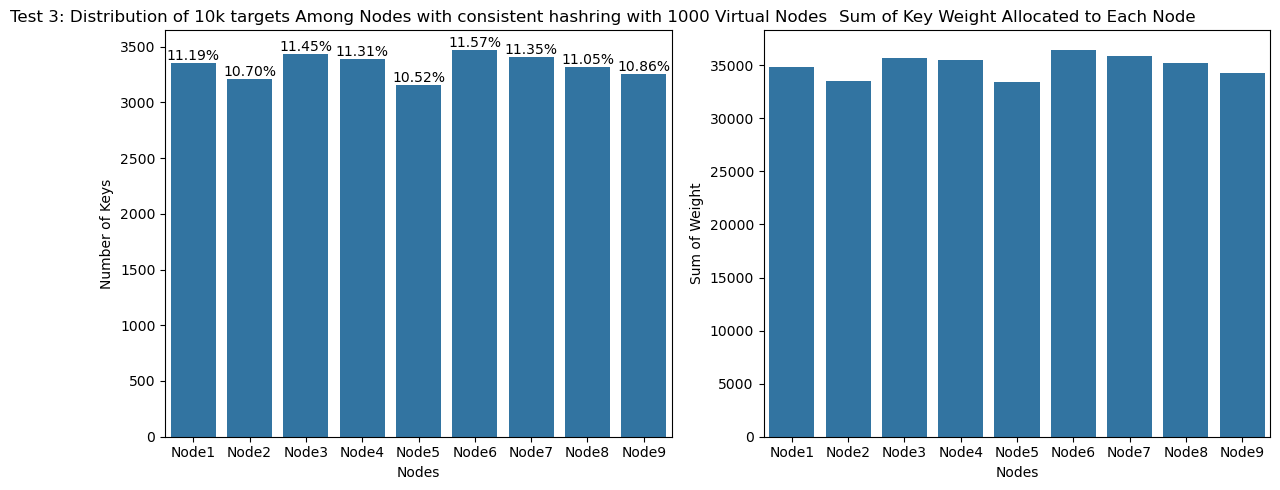

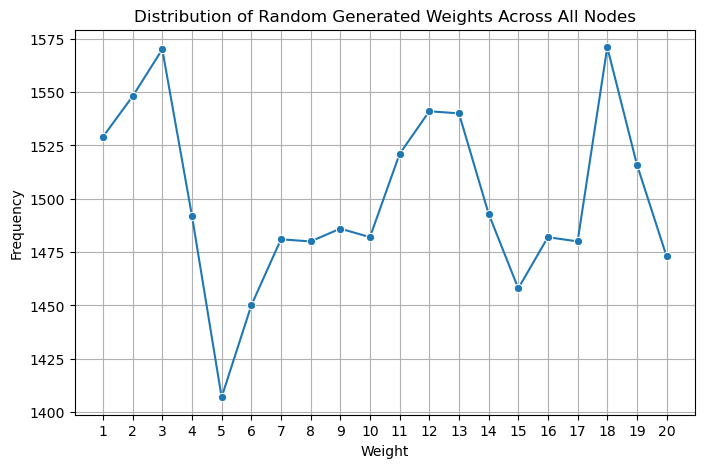

In [66]:
# Test 3
# Create a ConsistentHashRingWithVirtualNodes object with 9 nodes 1000 vNodes
hash_ring3 = ConsistentHashRingWithVirtualNodes(replicas=1000)

# add 9 nodes
# nodes = ['Node1', 'Node2', 'Node3']
nodes = ['Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8', 'Node9']
# nodes = ['Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8', 'Node9', 'Node10', 'Node11', 'Node12', 'Node13', 'Node14', 'Node15', 'Node16', 'Node17', 'Node18', 'Node19', 'Node20']
for node in nodes:
    hash_ring3.add_node(node)
    
num_of_keys = 30000

keys = [f'key{i}' for i in range(num_of_keys)]
distribution3 = {node: 0 for node in nodes}
weight_distro3 = {node: 0 for node in nodes}
total_weight_across_all_nodes = 0
weight_frequency3 = {i: 0 for i in range(1, 21)} 

for key in keys:
    weight = random.randint(1, 20)
    weight_frequency3[weight] += 1 
    node = hash_ring3.get_node(key)
    # print(f"debug: weight {weight} key {key} node {node}")
    distribution3[node] += 1
    weight_distro3[node] += weight
    total_weight_across_all_nodes += weight

dist = 100 / len(nodes)
ideal_weight_dist = total_weight_across_all_nodes / len(nodes)
print(f"Ideal distribution of keys {dist:.2f} % \n")
print(f"Total weight across all nodes {total_weight_across_all_nodes} AND ideal weight per node {ideal_weight_dist:.2f} \n")
min_dist = 100
max_dist = 0

for node, count in distribution3.items():
    pct = 100 * count / num_of_keys
    if pct < min_dist:
        min_dist = pct
    if pct > max_dist:
        max_dist = pct
    delta = abs(dist-pct)
    print(f"{node}: Number of Keys: {count} Percentage: {pct}% Delta to ideal {delta:.2f} pts")
    weight_of_node = weight_distro3[node]
    delta_w = abs(ideal_weight_dist - weight_of_node)
    delta_wp = (100 * delta_w) / ideal_weight_dist
    print(f"Total weight: {weight_of_node} Delta to ideal {delta_w:.2f} - {delta_wp:.2f} % \n")
    
print("----------------------------")
delta_min_max = max_dist - min_dist
print(f"\nDelta of keys between hottest and coldest node is {delta_min_max:.2f} pts ***")

# Find the node with the minimum weight
min_node = min(weight_distro3, key=weight_distro3.get)
min_weight = weight_distro3[min_node]

# Find the node with the maximum weight
max_node = max(weight_distro3, key=weight_distro3.get)
max_weight = weight_distro3[max_node]

delta_total = max_weight - min_weight
print(f"Delta of weights Total Delta: {delta_total}")
print(f"Max to avg ratio is {((100 * (max_weight - ideal_weight_dist))/ideal_weight_dist):.2f} %")
print(f"Min to avg ratio is {((100 * (min_weight - ideal_weight_dist))/ideal_weight_dist):.2f} %")

# Convert distribution dictionary to DataFrame for Seaborn
df = pd.DataFrame(distribution3.items(), columns=['Node', 'Number of Keys'])

# Calculate percentages
df['Percentage'] = df['Number of Keys'] / df['Number of Keys'].sum() * 100

# Plot distribution of keys among nodes using Seaborn (bar plot)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Node', y='Number of Keys')
plt.xlabel('Nodes')
plt.ylabel('Number of Keys')
plt.title('Test 3: Distribution of 10k targets Among Nodes with consistent hashring with 1000 Virtual Nodes')

# Display percentages on the bar chart
for i, row in df.iterrows():
    plt.text(i, row['Number of Keys'], f'{row["Percentage"]:.2f}%', ha='center', va='bottom')

# Calculate the sum of key sizes allocated to each node
df3 = pd.DataFrame(weight_distro3.items(), columns=['Node', 'Total Weight'])
# Visualize the sum of key sizes allocated to each node
plt.subplot(1, 2, 2)
sns.barplot(data=df3, x='Node', y='Total Weight')
plt.xlabel('Nodes')
plt.ylabel('Sum of Weight')
plt.title('Sum of Key Weight Allocated to Each Node')

plt.tight_layout()

# Plot distribution of weights across all nodes using 

# Convert weight_frequency dictionary to Pandas Series
weight_series = pd.Series(weight_frequency3)
plt.figure(figsize=(8, 5))
sns.lineplot(x=weight_series.index, y=weight_series.values, marker='o')

plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Random Generated Weights Across All Nodes')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


target load 8750.00
hashed_key 45131504060613901025413727152540483584.00
node load: 1000.00
debug: weight 7 key key0 node Node3
target load 3758.75
hashed_key 258772850759514222662438085102881734656.00
node load: 1007.00
debug: weight 3 key key1 node Node3
target load 6270.83
hashed_key 160795813082586694484661641558368452608.00
node load: 1010.00
debug: weight 5 key key2 node Node3
target load 11306.25
hashed_key 72034509442962812902287586806443540480.00
node load: 1015.00
debug: weight 9 key key3 node Node3
target load 25200.00
hashed_key 269796354888026927567172051972539809792.00
node load: 1024.00
debug: weight 20 key key4 node Node3
target load 5073.33
hashed_key 81968754187424766155087828202372988928.00
node load: 1044.00
debug: weight 4 key key5 node Node3
target load 17780.00
hashed_key 133493782479671792332189616181472133120.00
node load: 1048.00
debug: weight 14 key key6 node Node3
target load 24240.83
hashed_key 331732374026449963823112294926307557376.00
node load: 1062.00
d

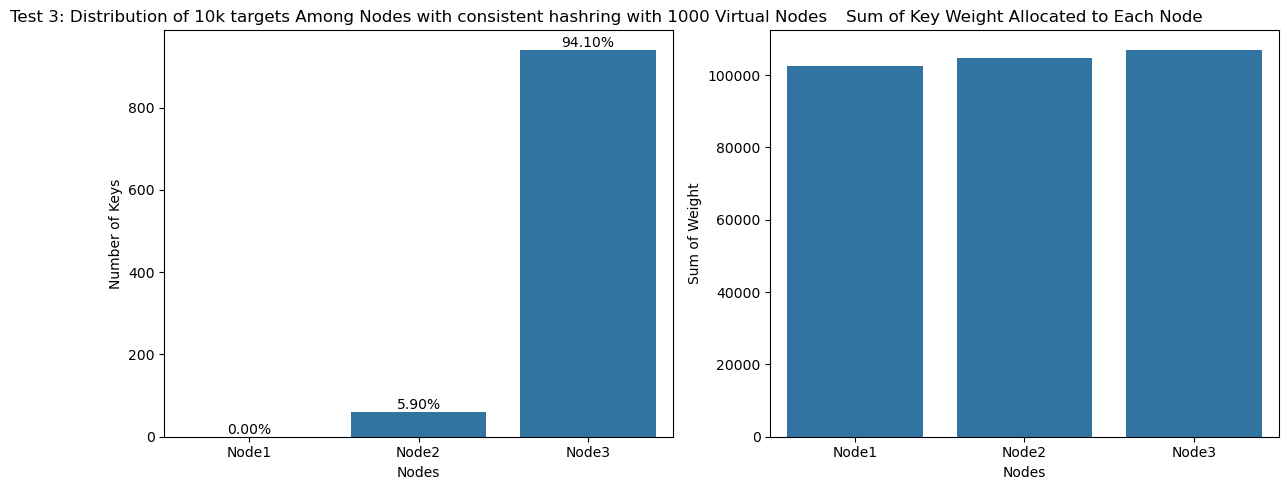

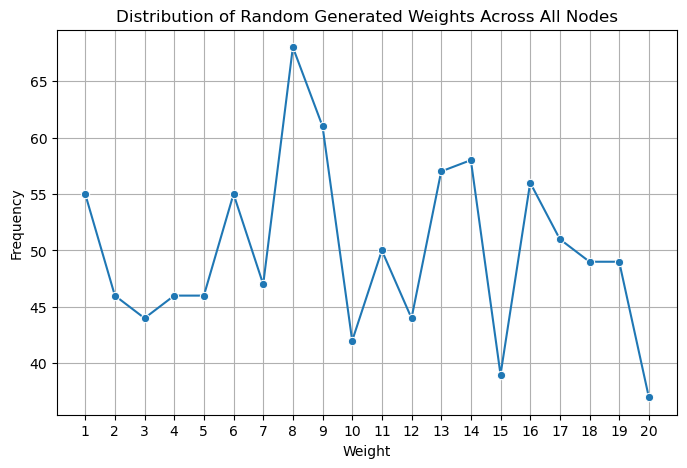

In [63]:
# Test 4
# Bounded Loads WIP!

class ConsistentHashRingWithBoundedLoad:
    def __init__(self, balancing_factor=1.25):
        self.nodes = {}
        self.balancing_factor = balancing_factor

    def add_node(self, node):
        self.nodes[node] = 1000  # Initialize load of each node to 0

    def remove_node(self, node):
        del self.nodes[node]

    def assign_key(self, key, weight):
        target_load = self._calculate_target_load(weight)
        print(f"target load {target_load:.2f}")
        hashed_key = self._hash(key)
        print(f"hashed_key {hashed_key:.2f}")
        nodes = list(self.nodes.keys())
        nodes.sort(key=lambda node: self._distance(hashed_key, node))

        for node in nodes:
            print(f"node load: {self.nodes[node]:.2f}")
            if self.nodes[node] < target_load:
                self.nodes[node] += weight
                return node

    def _calculate_target_load(self, key_weight):
        total_load = sum(self.nodes.values())
        num_nodes = len(self.nodes)
        average_load = total_load / num_nodes
        return self.balancing_factor * average_load * key_weight

    def _distance(self, hashed_key, node):
        # Calculate the distance between the hashed key and the node in the hash ring
        # For simplicity, assume node is a string
        return abs(hash(node) - hashed_key)

    def _hash(self, key):
        return int(hashlib.md5(key.encode()).hexdigest(), 16) 
    
# Create a ConsistentHashRingWithVirtualNodes object with 3 nodes 1000 vNodes
hash_ring4 = ConsistentHashRingWithBoundedLoad()
print(hash_ring4)

# add 9 nodes
nodes4 = ['Node1', 'Node2', 'Node3']
for node in nodes4:
    hash_ring4.add_node(node)
    
num_of_keys = 1000 # 000

keys = [f'key{i}' for i in range(num_of_keys)]
distribution4 = {node: 0 for node in nodes4}
weight_distro4 = {node: 0 for node in nodes4}
total_weight_across_all_nodes = 0
weight_frequency4 = {i: 0 for i in range(1, 21)} 

for key in keys:
    weight = random.randint(1, 20)
    weight_frequency4[weight] += 1 
    node =  hash_ring4.assign_key(key, weight)
    print(f"debug: weight {weight} key {key} node {node}")
    distribution4[node] += 1
    weight_distro4[node] += weight
    total_weight_across_all_nodes += weight

dist = 100 / len(nodes4)
ideal_weight_dist = total_weight_across_all_nodes / len(nodes)
print(f"Ideal distribution of keys {dist:.2f} % \n")
print(f"Total weight across all nodes {total_weight_across_all_nodes} AND ideal weight per node {ideal_weight_dist:.2f} \n")
min_dist = 100
max_dist = 0

for node, count in distribution3.items():
    pct = 100 * count / num_of_keys
    if pct < min_dist:
        min_dist = pct
    if pct > max_dist:
        max_dist = pct
    delta = abs(dist-pct)
    print(f"{node}: Number of Keys: {count} Percentage: {pct}% Delta to ideal {delta:.2f} pts")
    weight_of_node = weight_distro4[node]
    delta_w = abs(ideal_weight_dist - weight_of_node)
    delta_wp = (100 * delta_w) / ideal_weight_dist
    print(f"Total weight: {weight_of_node} Delta to ideal {delta_w:.2f} - {delta_wp:.2f} % \n")
    
print("----------------------------")
delta_min_max = max_dist - min_dist
print(f"\nDelta of keys between hottest and coldest node is {delta_min_max:.2f} pts ***")

# Find the node with the minimum weight
min_node = min(weight_distro4, key=weight_distro4.get)
min_weight = weight_distro3[min_node]

# Find the node with the maximum weight
max_node = max(weight_distro4, key=weight_distro4.get)
max_weight = weight_distro3[max_node]

delta_total = max_weight - min_weight
print(f"Delta of weights Total Delta: {delta_total}")
print(f"Max to avg ratio is {((100 * (max_weight - ideal_weight_dist))/ideal_weight_dist):.2f} %")
print(f"Min to avg ratio is {((100 * (min_weight - ideal_weight_dist))/ideal_weight_dist):.2f} %")

# Convert distribution dictionary to DataFrame for Seaborn
df = pd.DataFrame(distribution4.items(), columns=['Node', 'Number of Keys'])

# Calculate percentages
df['Percentage'] = df['Number of Keys'] / df['Number of Keys'].sum() * 100

# Plot distribution of keys among nodes using Seaborn (bar plot)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Node', y='Number of Keys')
plt.xlabel('Nodes')
plt.ylabel('Number of Keys')
plt.title('Test 3: Distribution of 10k targets Among Nodes with consistent hashring with 1000 Virtual Nodes')

# Display percentages on the bar chart
for i, row in df.iterrows():
    plt.text(i, row['Number of Keys'], f'{row["Percentage"]:.2f}%', ha='center', va='bottom')

# Calculate the sum of key sizes allocated to each node
df4 = pd.DataFrame(weight_distro4.items(), columns=['Node', 'Total Weight'])
# Visualize the sum of key sizes allocated to each node
plt.subplot(1, 2, 2)
sns.barplot(data=df3, x='Node', y='Total Weight')
plt.xlabel('Nodes')
plt.ylabel('Sum of Weight')
plt.title('Sum of Key Weight Allocated to Each Node')

plt.tight_layout()

# Plot distribution of weights across all nodes 

# Convert weight_frequency dictionary to Pandas Series
weight_series = pd.Series(weight_frequency4)
plt.figure(figsize=(8, 5))
sns.lineplot(x=weight_series.index, y=weight_series.values, marker='o')

plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Random Generated Weights Across All Nodes')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()
